## PROYECTO FINAL CIENCIA DE DATOS EN PYTHON

### Descripción general

El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

y = f(x) =  mx +b

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.

El siguiente ejemplo pertenece a una recta con parámetros m= 2, b = 1

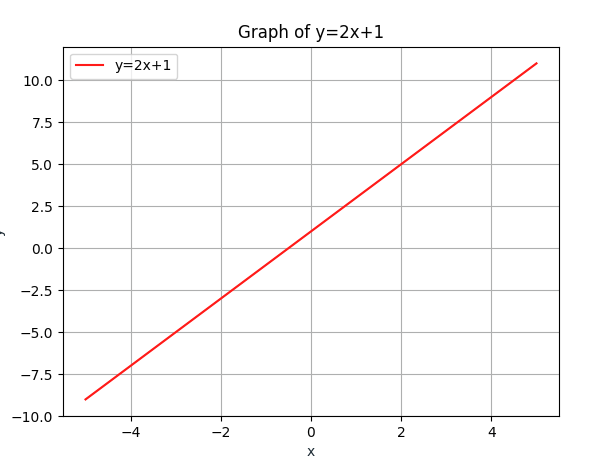

Se trabajara con un set de datos de muchas variables y se realiza un análisis exploratorio para entender los datos y entender cómo se comportan y luego  elegir las variables independientes “x” a trabajar(según el potencial predictivo de estas a través de medir la correlación) , esto significa que aun que el dataset posee multiples variables ,en vez de crear un modelo multi-variable crearemos multiples modelos uni-variable


Los datos se encuentran dados en el formato binario de NumPy .npy por lo tanto usaremos la función “load” de numpy para poderlos utilizar: https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html



In [2]:
import numpy as np

In [3]:
dataSource = np.load('proyecto_training_data.npy')
dataSource

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

Usando slicing como fue visto en clase el dataset usado será dividido de la siguiente forma:
* 80% del dataset(rows) se usará para todo el proceso(análisis exploratorio, selección de variables a usar, crear modelos predictivos). Les llamamos “datos de entrenamiento”
* 20% del dataset(rows) se usará para probar ,validar y evaluar los modelos resultantes.  Esto significa que el 20% de data no es usado durante todo el proyecto y es usado solo al final del mismo cuando ya poseemos los modelos predictivos. Les llamamos “datos de validación y pruebas”

Para cada variable elegida “x” se crearán 2 modelos predictivos de regresión lineal  y el resultado o predicción final será el promedio obtenido por los 2 modelos. 

Nota: Para este proyecto y este curso , no nos preocupamos en la definición de estos modelos y el proyecto consiste en convertir a código de Python las expresiones matemáticas dadas que definen los modelos a usar.

In [4]:
# se define el dataset con el 80% de los datos
# por lo que vendria siendo los datos de entrenamiento

filas, columnas = dataSource.shape
limiteFilasEntrenamiento = int(filas * 0.8)
limiteFilasEntrenamiento

# dataSourceEntrenamiento posee el 80% de datos del dataSource total
dataSourceEntrenamiento = dataSource[:,:][0:limiteFilasEntrenamiento]

# dataSourceValidacion posee el 80% de datos del dataSource total
dataSourceValidacion = dataSource[:,:][limiteFilasEntrenamiento:]

print(dataSourceEntrenamiento.shape)
print(dataSourceValidacion.shape)


(1168, 6)
(292, 6)


### Descripción detallada

Los datos del proyecto pertenecen al ejemplo clásico y muy común al iniciar a estudiar ciencia de datos: predicción de precios de casas.

Por lo tanto en el proyecto:

y = el precio de venta real de cierta casa

x = cierta característica de cierta casa

yhat = f(x) = precio estimado o predicción del precio de venta para una casa con cierta característica x

m = pendiente de la recta que usamos para aproximar el precio de la casa yhat

b = intercepto de la recta que usamos para  aproximar el precio de la casa yhat

m y b son conocidos como parámetros del modelo y son valores que necesitamos encontrar usando los datos x,y

### Análisis exploratorio de datos.
    
Para cada variable en el dataset calcular((usando numpy):
    
* media
* valor máximo
* valor mínimo 
* rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* desviación estándar 

In [5]:
x_0 = dataSourceEntrenamiento[:,0]
x_1 = dataSourceEntrenamiento[:,1]
x_2 = dataSourceEntrenamiento[:,2]
x_3 = dataSourceEntrenamiento[:,3]
x_4 = dataSourceEntrenamiento[:,4]
x_5 = dataSourceEntrenamiento[:,5]

# informacion de la variable x0 que realmente es y
print("Informacion de la variable x_0")
print("-----------------------------------------------------------")
print("media x_0:" , np.mean(x_0))
print("max x_0:" , np.nanmax(x_0))
print("min x_0:" , np.nanmin(x_0))
print("rango x_0:" , np.ptp(x_0))
print("desviacion estandar x_0:" , np.std(x_0))
print("")

# informacion de la variable x1
print("Informacion de la variable x_1")
print("-----------------------------------------------------------")
print("media x_1:" , np.mean(x_1))
print("max x_1:" , np.nanmax(x_1))
print("min x_1:" , np.nanmin(x_1))
print("rango x_1:" , np.ptp(x_1))
print("desviacion estandar x_1:" , np.std(x_1))
print("")

# informacion de la variable x2
print("Informacion de la variable x_2")
print("-----------------------------------------------------------")
print("media x_2:" , np.mean(x_2))
print("max x_2:" , np.nanmax(x_2))
print("min x_2:" , np.nanmin(x_2))
print("rango x_2:" , np.ptp(x_2))
print("desviacion estandar x_2:" , np.std(x_2))
print("")

# informacion de la variable x3
print("Informacion de la variable x_3")
print("-----------------------------------------------------------")
print("media x_3:" , np.mean(x_3))
print("max x_3:" , np.nanmax(x_3))
print("min x_3:" , np.nanmin(x_3))
print("rango x_3:" , np.ptp(x_3))
print("desviacion estandar x_3:" , np.std(x_3))
print("")

# informacion de la variable x4
print("Informacion de la variable x_4")
print("-----------------------------------------------------------")
print("media x_4:" , np.mean(x_4))
print("max x_4:" , np.nanmax(x_4))
print("min x_4:" , np.nanmin(x_4))
print("rango x_4:" , np.ptp(x_4))
print("desviacion estandar x_4:" , np.std(x_4))
print("")

# informacion de la variable x5
print("Informacion de la variable x_5")
print("-----------------------------------------------------------")
print("media x_5:" , np.mean(x_5))
print("max x_5:" , np.nanmax(x_5))
print("min x_5:" , np.nanmin(x_5))
print("rango x_5:" , np.ptp(x_5))
print("desviacion estandar x_5:" , np.std(x_5))
print("")


Informacion de la variable x_0
-----------------------------------------------------------
media x_0: 180590.27739726027
max x_0: 755000.0
min x_0: 34900.0
rango x_0: 720100.0
desviacion estandar x_0: 78781.95108033362

Informacion de la variable x_1
-----------------------------------------------------------
media x_1: 6.101027397260274
max x_1: 10.0
min x_1: 1.0
rango x_1: 9.0
desviacion estandar x_1: 1.377435193240741

Informacion de la variable x_2
-----------------------------------------------------------
media x_2: 1156.3236301369864
max x_2: 3228.0
min x_2: 334.0
rango x_2: 2894.0
desviacion estandar x_2: 373.620331503586

Informacion de la variable x_3
-----------------------------------------------------------
media x_3: 6.4854452054794525
max x_3: 14.0
min x_3: 2.0
rango x_3: 12.0
desviacion estandar x_3: 1.6084517167387253

Informacion de la variable x_4
-----------------------------------------------------------
media x_4: 1971.451198630137
max x_4: 2010.0
min x_4: 1875.0


D:\ProgramFiles\Anaconda\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
D:\ProgramFiles\Anaconda\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)  para graficar  un histograma de la variable.


In [6]:
import seaborn as sns

D:\ProgramFiles\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


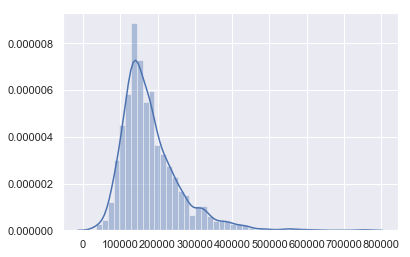

In [7]:
# grafica para la variable x0
sns.set(); np.random.seed(0)
histograma_x_0 = sns.distplot(x_0)

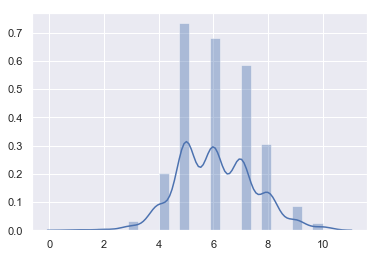

In [8]:
# grafica para la variable x1
sns.set(); np.random.seed(0)
histograma_x_1 = sns.distplot(x_1)

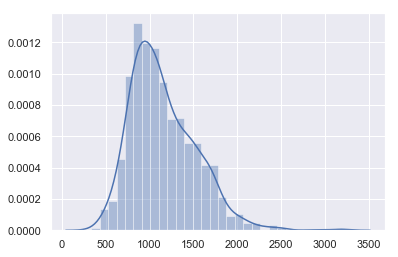

In [9]:
# grafica para la variable x2
sns.set(); np.random.seed(0)
histograma_x_2 = sns.distplot(x_2)

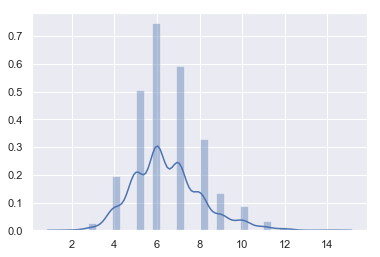

In [10]:
# grafica para la variable x3
sns.set(); np.random.seed(0)
histograma_x_3 = sns.distplot(x_3)

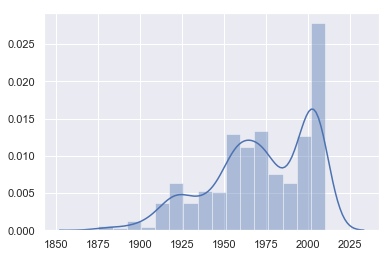

In [11]:
# grafica para la variable x4
sns.set(); np.random.seed(0)
histograma_x_4 = sns.distplot(x_4)

#### Para cada variable independiente x :

* Calcular el coeficiente de correlación entre x y y

In [12]:
print("Coeficiente Y y X1", np.corrcoef(x_0, x_1))
print("Coeficiente Y y X2", np.corrcoef(x_0, x_2))
print("Coeficiente Y y X3", np.corrcoef(x_0, x_3))
print("Coeficiente Y y X4", np.corrcoef(x_0, x_4))

Coeficiente Y y X1 [[1.         0.79399005]
 [0.79399005 1.        ]]
Coeficiente Y y X2 [[1.        0.6162887]
 [0.6162887 1.       ]]
Coeficiente Y y X3 [[1.         0.56470694]
 [0.56470694 1.        ]]
Coeficiente Y y X4 [[1.         0.53417069]
 [0.53417069 1.        ]]


* graficar x vs y(scatterplot) usando matplotlib
* Colocar el coeficiente de correlación como parte del título de la gráfica. 

In [13]:
import sys
import matplotlib.pyplot as plt

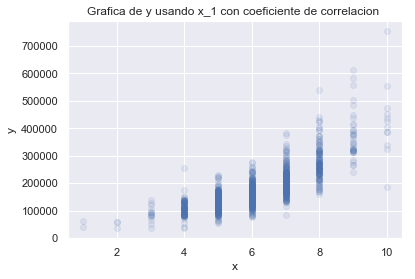

In [14]:
plt.scatter(x_1, x_0, alpha=0.1)
#plt.plot(x_1,x_0)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de y usando x_1 con coeficiente de correlacion ' )

plt.show()

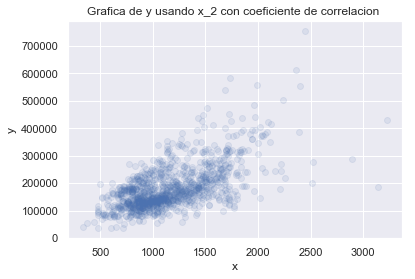

In [15]:
plt.scatter(x_2, x_0, alpha=0.1)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de y usando x_2 con coeficiente de correlacion ' )

plt.show()

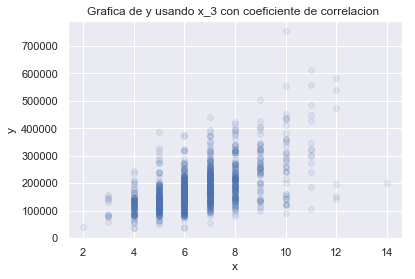

In [16]:
plt.scatter(x_3, x_0, alpha=0.1)
#plt.plot(x_1,x_0)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de y usando x_3 con coeficiente de correlacion ' )

plt.show()

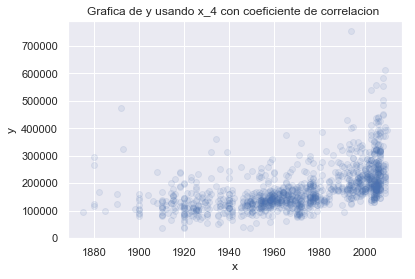

In [17]:
plt.scatter(x_4, x_0, alpha=0.1)
#plt.plot(x_1,x_0)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de y usando x_4 con coeficiente de correlacion ' )

plt.show()

* Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo(la 2 que presentan mayor correlación).

Basado en el coeficiente de correlacion y en las graficas, se va a utilizar las variables x_1 y x_2 ya que presentan el mayor grado de correlacion. Estas variables representan los siguientes valores respectivamente.

* 1stFlrSF: First Floor square feet
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Crear una función para entrenar un modelo de regresión lineal de una variable y = mx +b.
La función recibe como argumentos:
* vector con  la variable independiente “x” ,  
* vector con la variable dependiente “y”,  
* un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
* un entero  “imprimir_error_cada”  , que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50
* escalar lr(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

Ejemplo de la definicion de la funcion

##### def entrenar_modelo(x, y, epochs, imprimir_error_cada, lr)

In [25]:
def entrenar_modelo(x, y, epochs, imprimir_error_cada, lr):
    array_ones = np.ones_like(x)
    
    #crear una matriz de 2 columnas la primera columan corresponde al vector de datos x y la segunda columna de la matriz
    #para todas las filas es igual a 1
    
    matriz = np.column_stack((x,array_ones))
    #x_0 = dataSourceEntrenamiento[:,0]
    m = 0.0
    b = 25000.0
    
    vector = np.array([[m],
                            [b]])
    
    epoch = 0
    y = dataSourceEntrenamiento[:,0].reshape((-1,1))
    arr_errores = []
    arr_parametros = []
    
    #matriz_yhat = np.dot(matriz, vector)
    
    while epoch < epochs:
        # se calcula yhat
        yhat_epoch = np.dot(matriz, vector)
        error_epoch = np.mean(np.power((y - yhat_epoch), 2))/2
        gradiente_epoch = np.mean(np.dot(np.transpose(yhat_epoch - y), matriz), axis=0)
        
        # agregar nuevo error
        arr_errores.append(error_epoch)
        
        # agregar nuevos parametros
        arr_parametros.append(list(vector.flatten()))

        # Actualizar los parámetros del modelo
        vector[0,0] -= lr * gradiente_epoch[0] # m
        vector[1,0] -= lr * gradiente_epoch[1] # b
        
        if ((epoch % imprimir_error_cada == 0)):
            print("Epoch:", epoch, " con los parametros - >", vector[0,0], vector[1,0], " - Error:", error_epoch)
        
        epoch+=1
    
    return np.asarray(arr_errores), np.asarray(arr_parametros)


    
entrenar_modelo(dataSourceEntrenamiento[:,1], dataSourceEntrenamiento[:,0], 50, 10, 0.03)
    


Epoch: 0  con los parametros - > 36281186.49 5476883.319999999  - Error: 15207465118.29024
Epoch: 10  con los parametros - > 1.0715087479884151e+39 1.6731208927903824e+38  - Error: 1.1969258552384022e+73
Epoch: 20  con los parametros - > 3.16963104294294e+70 4.949260498657324e+69  - Error: 1.0473533583371348e+136
Epoch: 30  con los parametros - > 9.376088592135521e+101 1.4640412171721383e+101  - Error: 9.164720207348099e+198
Epoch: 40  con los parametros - > 2.7735416550548984e+133 4.330781712056483e+132  - Error: 8.019461226756002e+261


D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in power


(array([1.52074651e+010, 2.69304671e+016, 5.30208229e+022, 1.04387636e+029,
        2.05518849e+035, 4.04626440e+041, 7.96630364e+047, 1.56840946e+054,
        3.08789164e+060, 6.07945503e+066, 1.19692586e+073, 2.35651304e+079,
        4.63951352e+085, 9.13429520e+091, 1.79836417e+098, 3.54062751e+104,
        6.97080344e+110, 1.37241493e+117, 2.70201673e+123, 5.31974275e+129,
        1.04735336e+136, 2.06203403e+142, 4.05974192e+148, 7.99283824e+154,
        1.57363361e+161, 3.09817696e+167, 6.09970481e+173, 1.20091264e+180,
        2.36436224e+186, 4.65496707e+192, 9.16472021e+198, 1.80435426e+205,
        3.55242082e+211, 6.99402218e+217, 1.37698625e+224, 2.71101675e+230,
        5.33746204e+236, 1.05084194e+243, 2.06890236e+249, 4.07326433e+255,
        8.01946123e+261, 1.57887515e+268, 3.10849654e+274, 6.12002204e+280,
        1.20491271e+287, 2.37223759e+293, 4.67047208e+299,             inf,
                    inf,             inf]),
 array([[ 0.00000000e+000,  2.50000000e+004]

Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo: crear una función que tome como parámetro el vector de errores generados por la función de entrenamiento y grafique en el eje “x” el número de iteración y en el eje “y”  el error para esa iteración:

In [27]:
def grafica_error(errores_arreglo, n, stop_iteration, nombre):
    arr_posiciones = np.arange(np.size(errores_arreglo) + 1)
    plt.plot(arr_posiciones[:stop_iteration:n], errores_arreglo[:stop_iteration:n])
    plt.title('GRAFICA ERROR - ' + str(nombre))
    plt.ylabel('Y - Error')
    plt.xlabel('X - Iteracion')    
    plt.show()

Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo : Crear una función que tome como parámetro la estructura de datos conteniendo el historial de modelos ,y un valor “n” que indica cada cuantas iteraciones graficar el modelo resultante,  por ejemplo para n=3 la función debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

In [34]:
def grafica_modelo(x, arr_parametros, n, nombre_grafica):
    # Crear un vector con una columna de unos
    x_unos = np.column_stack((x, np.ones(np.size(x, 0))))
    arr_parametros_filter = arr_parametros[::n]
    for i in range(0, np.size(arr_parametros_filter, 0)):
        plt.plot(x, x_unos.dot(arr_parametros_filter[i]))
    
    # Dibujar scatter plot real
    plt.scatter(x, dataSourceEntrenamiento[:,0])
    
    plt.title('Entrenamiento del modelo en el tiempo X = ' + str(nombre_grafica))
    plt.xlabel('X - ' + str(nombre_grafica))
    plt.ylabel('Y')
    plt.show()

Ya definidas las funciones se procede a realizar el analisis del proyecto, ahora se analiza para la variable x_1 la cual es OverallQual

Epoch: 0  con los parametros - > 51035.53566260001 32668.982536800002  - Error: 15207465118.29024
Epoch: 1000  con los parametros - > 43522.04558781288 -84365.83519978379  - Error: 1150485624.6955218
Epoch: 2000  con los parametros - > 45229.29838003629 -95299.51195982135  - Error: 1146949575.3652234
Epoch: 3000  con los parametros - > 45394.3372645845 -96356.46253233346  - Error: 1146916531.167589
Epoch: 4000  con los parametros - > 45410.29145340308 -96458.63717470288  - Error: 1146916222.3712752
Epoch: 5000  con los parametros - > 45411.83373322126 -96468.51432299602  - Error: 1146916219.48559
Epoch: 6000  con los parametros - > 45411.9828242885 -96469.46913973083  - Error: 1146916219.4586234

Analisis para la variable 1 para (m y b):  [ 45411.98278697 -96469.46890071]


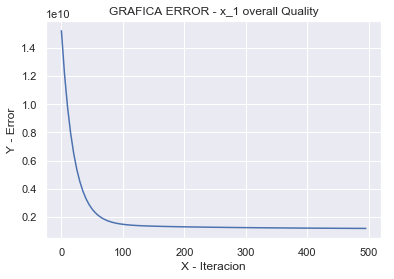

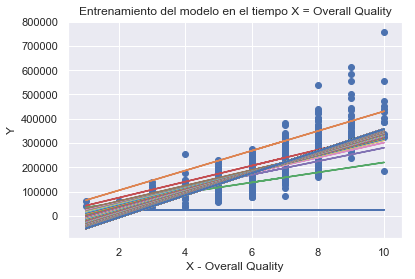

In [36]:
arr_errores_x_1_OverallQual, arr_parametros_x_1_OverallQual = entrenar_modelo(dataSourceEntrenamiento[:,1], 
                                                                      dataSourceEntrenamiento[:,0], 
                                                                      6001, 
                                                                      1000, 
                                                                      0.0000422                                                                      )
# Imprimir resultados
print('\nAnalisis para la variable 1 para (m y b): ', arr_parametros_x_1_OverallQual[-1])
grafica_error(arr_errores_x_1_OverallQual, 5, 500, 'x_1 overall Quality')
grafica_modelo(dataSourceEntrenamiento[:,1], arr_parametros_x_1_OverallQual, 25, 'Overall Quality')

Se procede con el entrenamiento para la variable x_2_1stFlorSF

Epoch: 0  con los parametros - > 268.2222339453945 25000.21071529032  - Error: 15207465118.29024
Epoch: 10000  con los parametros - > 166.62026961229873 25006.943371713067  - Error: 2706296511.272936
Epoch: 20000  con los parametros - > 141.98886381298001 25013.727584922548  - Error: 1971808991.7424343
Epoch: 30000  con los parametros - > 136.0144107439322 25020.517703119865  - Error: 1928652253.5084589
Epoch: 40000  con los parametros - > 134.5622346637424 25027.302669166882  - Error: 1926113454.7311985
Epoch: 50000  con los parametros - > 134.20622161747173 25034.079811339496  - Error: 1925961100.1488414

Analisis para la variable 2 para (m y b):  [  133.98179544 25034.07895829]


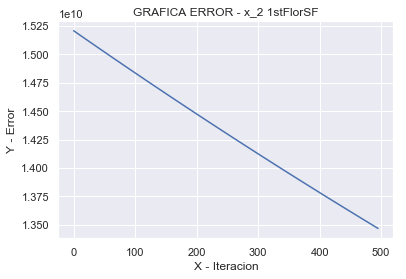

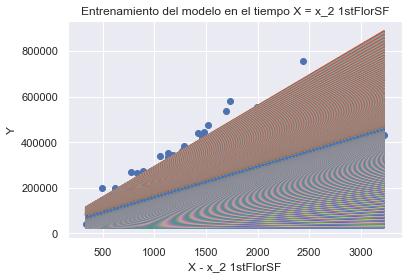

In [37]:
arr_errores_x_2_1stFlorSF, arr_parametros_x_2_1stFlorSF = entrenar_modelo(dataSourceEntrenamiento[:,2], 
                dataSourceEntrenamiento[:,0], 50001, 10000, 0.0000000011595)
# Imprimir resultados
print('\nAnalisis para la variable 2 para (m y b): ', arr_parametros_x_2_1stFlorSF[-1])
grafica_error(arr_errores_x_2_1stFlorSF, 5, 500, 'x_2 1stFlorSF')
grafica_modelo(dataSourceEntrenamiento[:,2], arr_parametros_x_2_1stFlorSF, 25, 'x_2 1stFlorSF')

* Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como parámetros a la funcion) calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción estimada promediando las predicciones de los 2  modelos, la función debe recibir como parámetro adicional un vector de cualquier tamaño de x  y devolver 3 vectores cada uno del mismo tamaño del vector x.
La predicción con el modelo entrenado manualmente
La predicción con el modelo de scikit-learn
La combinación(promedio) de las 2 anteriores.
* Usando el 20% de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente  y usando los valores reales de “y” calculamos el error de cada modelo.
